In [2]:
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('Medical_Cost.csv',delimiter=',' )
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
df.info()
#age       кількісний
#sex       binarniy
#bmi       кількісний
#children  кількісний
#smoker    бінарний
#region    категоріальний
#charges   кількисний

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
df.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


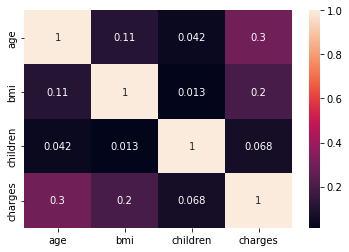

In [ ]:
sns.heatmap(df.corr(), annot=True)

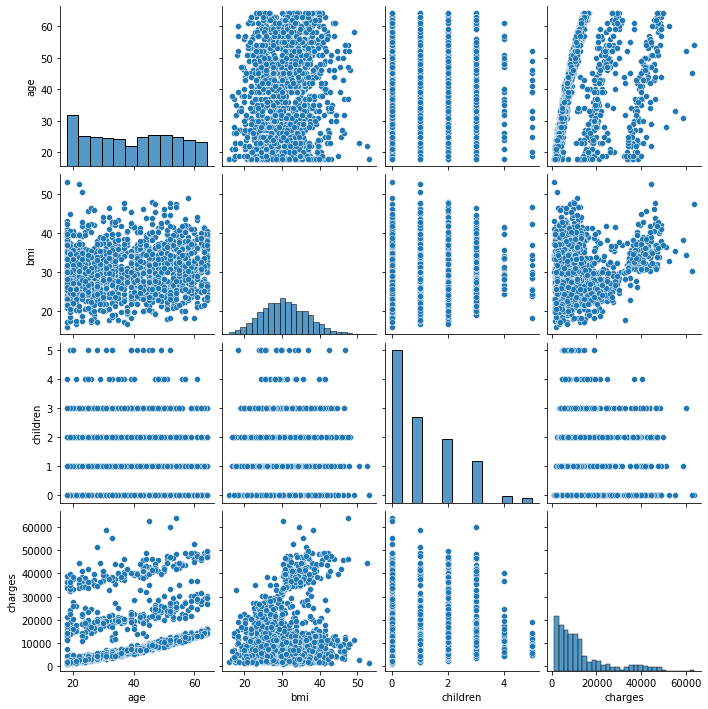

In [ ]:
cols = ['age', 'bmi', 'children', 'charges']
sns.pairplot(df[cols])

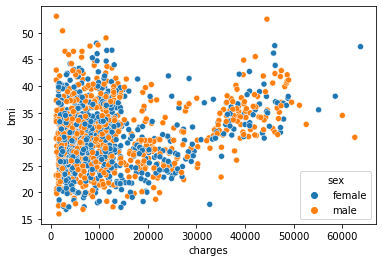

In [ ]:
sns.scatterplot(data = df, y="bmi", x = 'charges' , hue = 'sex') #наче вплив мінімальний(єдине - можливе групування)

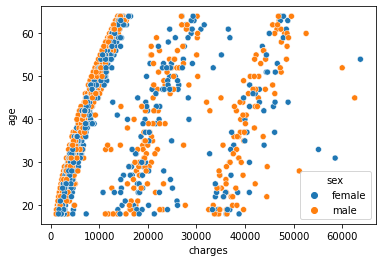

In [ ]:
sns.scatterplot(data = df, y="age", x = 'charges' , hue = 'sex') #чим молодше тим меньше (за виключаенням деяких випадків)
#ще видно, що певний діапазон цін майже не юзається, показує внутрішню систему оцінки людских потреб в деякій мірі

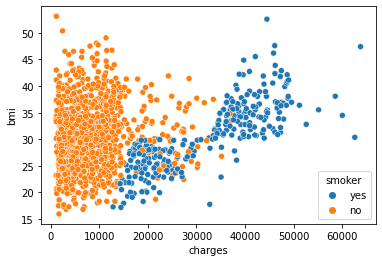

In [ ]:
sns.scatterplot(data = df, y="bmi", x = 'charges' , hue = 'smoker') #курящі платять більше

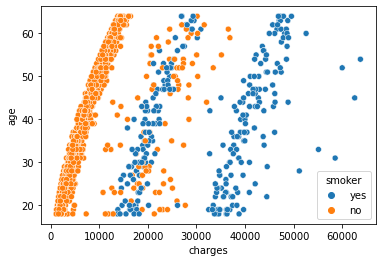

In [ ]:
sns.scatterplot(data = df, y="age", x = 'charges' , hue = 'smoker') 

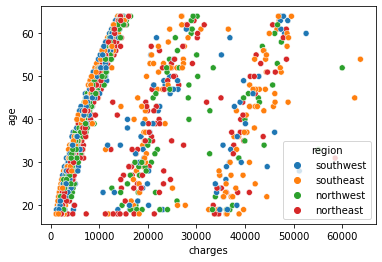

In [ ]:
sns.scatterplot(data = df, y="age", x = 'charges' , hue = 'region') #ніякого впливу

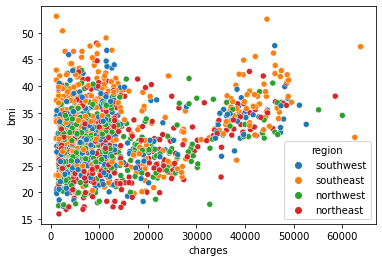

In [ ]:
sns.scatterplot(data = df, y="bmi", x = 'charges' , hue = 'region') #чим худіші тим меньше платять

In [ ]:
X=df.drop(columns=['charges','region'])
X

,age,sex,bmi,children,smoker
0,19,female,27.900,0,yes
1,18,male,33.770,1,no
2,28,male,33.000,3,no
3,33,male,22.705,0,no
4,32,male,28.880,0,no
...,...,...,...,...,...
1333,50,male,30.970,3,no
1334,18,female,31.920,0,no
1335,18,female,36.850,0,no
1336,21,female,25.800,0,no


In [ ]:
y=df['charges'].values
y

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

In [ ]:
X['smoker']=X.smoker.replace({'yes':1,'no':0})
X['sex']=X.sex.replace({'male':1,'female':0})
X

,age,sex,bmi,children,smoker
0,19,0,27.900,0,1
1,18,1,33.770,1,0
2,28,1,33.000,3,0
3,33,1,22.705,0,0
4,32,1,28.880,0,0
...,...,...,...,...,...
1333,50,1,30.970,3,0
1334,18,0,31.920,0,0
1335,18,0,36.850,0,0
1336,21,0,25.800,0,0


In [ ]:
rng = MinMaxScaler(feature_range=(0,1)) #границі
tmp = rng.fit_transform(X) #перетворюємо Х у 1-0 формат для льорна
X_1_0 = pd.DataFrame(tmp, columns=X.columns) #назад у датафрейм
X['bmi'] = X_1_0['bmi'] #заміна одного стовпця
X

,age,sex,bmi,children,smoker
0,19,0,0.321227,0,1
1,18,1,0.479150,1,0
2,28,1,0.458434,3,0
3,33,1,0.181464,0,0
4,32,1,0.347592,0,0
...,...,...,...,...,...
1333,50,1,0.403820,3,0
1334,18,0,0.429379,0,0
1335,18,0,0.562012,0,0
1336,21,0,0.264730,0,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
multiple_linear_reg=LinearRegression().fit(X_test,y_test) #метод найменших квадратів

LinearRegression()

In [ ]:
y_pred_train=multiple_linear_reg.predict(X_train)
y_pred_test=multiple_linear_reg.predict(X_test)

In [ ]:
r2_score(y_train,y_pred_train)

0.7403872988666501

In [ ]:
mean_squared_error(y_train,y_pred_train)

37408968.80244081

In [ ]:
r2_score(y_test,y_pred_test)

0.7585422710688905

In [ ]:
mean_squared_error(y_test,y_pred_test)

37135469.95989883